In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
brfss = pd.read_hdf("brfss.hdf5","brfss")

In [188]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


# Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

In [189]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

##  Run regression with linregress

In [190]:
# Run regression with linregress
subset = brfss.dropna(subset=["INCOME2","_VEGESU1"])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)


## Run regression with StatsModels

We have to regress _VEGESU1 as a function of income.

In [191]:
# Run regression with StatsModels
results = smf.ols("_VEGESU1 ~ INCOME2", data = brfss).fit()
print(results.params)

Intercept    1.528779
INCOME2      0.069880
dtype: float64


## Scipy does not do multiple regression, we have to use StatsModels.

In [192]:
print("--"*50)

----------------------------------------------------------------------------------------------------


# Multiple Regression

In [193]:
gss = pd.read_hdf("gss.hdf5","gss")

In [194]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [195]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

1 - realinc is the variable we try to predict

2 - educ is the variable we use to inform the predictions

In [196]:
results = smf.ols("realinc ~ educ", data = gss).fit()

In [197]:
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [198]:
results = smf.ols("realinc ~ educ + age",data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [199]:
grouped = gss.groupby("age")

In [200]:
mean_income_by_age = grouped["realinc"].mean()
mean_income_by_age

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64

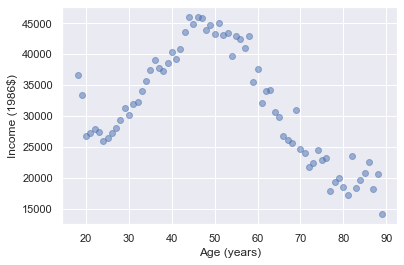

In [201]:
sns.set()

plt.plot(mean_income_by_age, "o", alpha=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Income (1986$)")

plt.show()

## Correlation and Simple Lineear regression can't measure the nonlineer relations

## Multiple regression can measure nonlinear regression

In [202]:
gss["age2"] = gss["age"]**2

In [203]:
model = smf.ols("realinc ~ educ + age + age2", data = gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

## Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

In [204]:
# Group by educ
grouped2 = gss.groupby("educ")

In [205]:
# Compute mean income in each group
mean_income_by_educ = grouped2["realinc"].mean()
mean_income_by_educ

educ
0.0     15290.635124
1.0     13347.171875
2.0     25174.645592
3.0     12203.863350
4.0     14038.376914
5.0     16599.309871
6.0     14480.535269
7.0     17219.840438
8.0     18591.974047
9.0     19304.799414
10.0    22274.634658
11.0    24559.914503
12.0    30265.888455
13.0    33526.841312
14.0    36918.908456
15.0    37683.367151
16.0    49576.572500
17.0    51157.571004
18.0    57480.893192
19.0    58796.273113
20.0    64833.451064
Name: realinc, dtype: float64

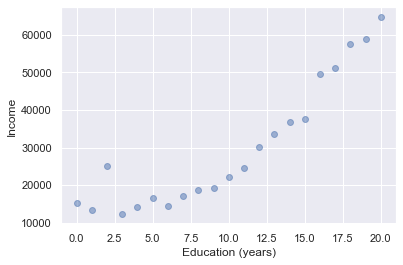

In [206]:
# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, "o", alpha = 0.5)
plt.xlabel("Education (years)")
plt.ylabel("Income")

plt.show()

## Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [207]:
import statsmodels.formula.api as smf

In [208]:
# Add a new column with educ squared
gss["educ2"] = gss["educ"]**2

In [209]:
# Run a regression model with educ, educ2, age, and age2
model = smf.ols("realinc ~ educ + educ2 + age + age2", data = gss)
results = model.fit()

In [210]:
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

# Visualizing regression results

### Sometimes the best way to understand the model, is by looking at predictions rather than its parameters

In [211]:
df = pd.DataFrame()

In [212]:
df["age"] = np.linspace(18,85)
df["age"].head()

0    18.000000
1    19.367347
2    20.734694
3    22.102041
4    23.469388
Name: age, dtype: float64

In [213]:
df["age2"] = df["age"]**2

In [214]:
df["educ"] = 12
df["educ2"] = df["educ"]**2

In [215]:
pred12 = results.predict(df)

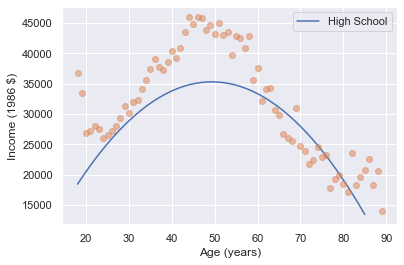

In [216]:
plt.plot(df["age"], pred12, label = "High School")
plt.plot(mean_income_by_age, "o", alpha = 0.5)

plt.xlabel("Age (years)")
plt.ylabel("Income (1986 $)")

plt.legend()
plt.show()

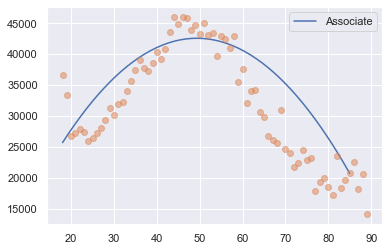

In [217]:
df["educ"] = 14
df["educ2"] = df["educ"]**2
pred14 = results.predict(df)
plt.plot(df["age"], pred14, label = "Associate")
plt.plot(mean_income_by_age, "o", alpha = 0.5)

plt.legend()
plt.show()

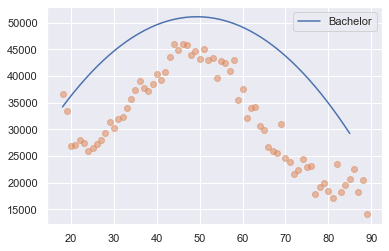

In [218]:
df["educ"] = 16
df["educ2"] = df["educ"]**2
pred16 = results.predict(df)
plt.plot(df["age"], pred16, label = "Bachelor")
plt.plot(mean_income_by_age, "o", alpha = 0.5)

plt.legend()
plt.show()

### All of them together

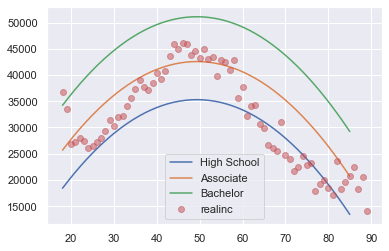

In [219]:
df["educ"] = 12
df["educ2"] = df["educ"]**2
pred12 = results.predict(df)
plt.plot(df["age"], pred12, label = "High School")

df["educ"] = 14
df["educ2"] = df["educ"]**2
pred14 = results.predict(df)
plt.plot(df["age"], pred14, label = "Associate")

df["educ"] = 16
df["educ2"] = df["educ"]**2
pred16 = results.predict(df)
plt.plot(df["age"], pred16, label = "Bachelor")

plt.plot(mean_income_by_age, "o", alpha = 0.5, label = "realinc")

plt.legend()
plt.show()

# Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

In [220]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

In [221]:
# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

In [222]:
# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


# Visualizing predictions

Now let's visualize the results from the previous exercise!

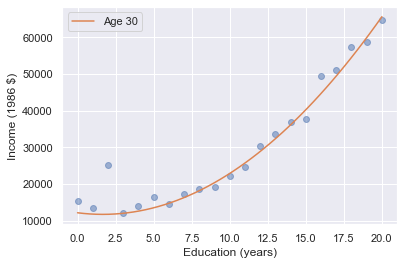

In [223]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, "o", alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df["educ"], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Logistic regression

1 - Numerical variables: income, age, years of education

2 - Categorical variables: sex, race

In [224]:
gss.sex.nunique()

2

In [225]:
gss.sex.value_counts()

2    33820
1    28646
Name: sex, dtype: int64

2 - female

1 - male

In [226]:
formula = "realinc ~ educ + educ2 + age + age2 + C(sex)"

In [227]:
results = smf.ols(formula, data = gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

Income for Women is about 4100 $ less than man.

In [228]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall', 'age2', 'educ2'],
      dtype='object')

In [229]:
gss["gunlaw"].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

1 - Yes

2 - No

If you do not replace 2 there will be erro with logit results.

In [230]:
gss['gunlaw'].replace(2, 0, inplace=True)

1 means Yes

0 means No

In [231]:
gss["gunlaw"].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [232]:
formula = "gunlaw ~ age + age2 + educ + educ2 + C(sex)"
results = smf.logit(formula, data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

2 means Women, %75 women are more likey this support of gun law

to see more details let's create plots

In [233]:
df = pd.DataFrame()
df["age"] = np.linspace(18,89)
df["educ"] = 12

In [234]:
df["age2"] = df["age"]**2
df["educ2"] = df["educ"] ** 2

In [235]:
df["sex"] = 1
pred1 = results.predict(df)

In [236]:
df["sex"] = 2
pred2 = results.predict(df)

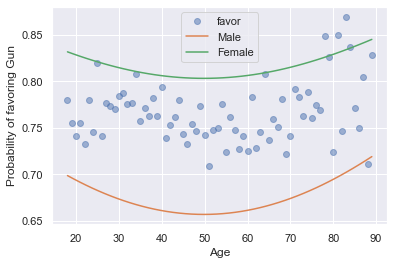

In [237]:
grouped = gss.groupby("age")
favor_by_age = grouped["gunlaw"].mean()

plt.plot(favor_by_age, "o", alpha = 0.5, label = "favor")
plt.plot(df["age"], pred1, label = "Male")
plt.plot(df["age"], pred2, label = "Female")

plt.xlabel("Age")
plt.ylabel ("Probability of favoring Gun")
plt.legend()
plt.show()

according to results people are around 50 are less likelt to sopprt gunlaw
women are more likely to supportive than man

# Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

In [238]:
gss['grass'].value_counts()

2.0    25195
1.0    11027
Name: grass, dtype: int64

In [239]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

In [240]:
gss['grass'].value_counts()

0.0    25195
1.0    11027
Name: grass, dtype: int64

In [241]:
# Run logistic regression
results = smf.logit("grass ~ age + age2 + educ + educ2 + C(sex)", data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [242]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

In [243]:
# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

In [244]:
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

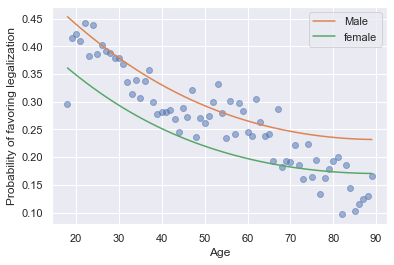

In [245]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped["grass"].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()